In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data

with open('surveys.json') as f:
    data = json.load(f)

ageRangeSortings = ["-24", "25-34", "35-44", "45-54", "55-64", "65+"]

COLOR = '#fff'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR



In [11]:
def plot_sorted_by_age_range(data, question, color="blue"):
    def run_qstn(x):
        try:
            return question(x)
        except:
            return 0.5

    dataQ1 = [run_qstn(x) for x in data]
    dataQ1AgeRanges = [x["data1"]["ageRange"] for x in data]

    dataQ1Grouped = {}
    for value, label in zip(dataQ1, dataQ1AgeRanges):
        if label not in dataQ1Grouped:
            dataQ1Grouped[label] = []
        dataQ1Grouped[label].append(value)

    dataQ1GroupedMean = {label: np.mean(values) for label, values in dataQ1Grouped.items()}

    def tryGroup(ageRange):
        try:
            return dataQ1GroupedMean[ageRange]
        except:
            return 0.5

    # order age ranges by ageRangeSortings
    dataQ1GroupedMean = {ageRange: tryGroup(ageRange) for ageRange in ageRangeSortings}

    #set y-axis labels and size
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylim(0, 1)

    # plot the data (line chart, labels = age ranges, x = data2Q1)
    plt.plot(dataQ1GroupedMean.keys(), [1 - x for x in dataQ1GroupedMean.values()], color=color)


def plot_values(data, question, x_0, x_1, color="blue"):
    plt.ylabel(f"{x_0} (0) zu {x_1} (1)")
    plt.xlabel("Alter")

    plot_sorted_by_age_range(data, question, color)


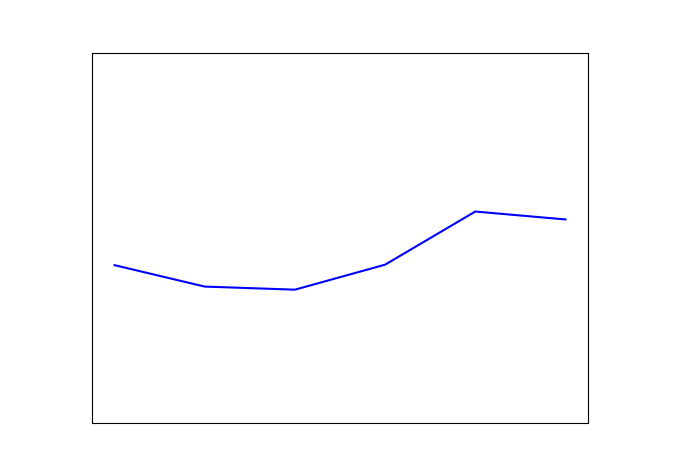

In [13]:
plt.title("Wie würden Sie sich fühlen, mit einem voll autonom fahrenden Auto zu fahren?\n")

plot_values(data, lambda x: x["data2"]["q1"], "Sehr Unsicher", "Sehr Sicher", color="blue")
plt.savefig("results/akzeptanz.png", transparent=True, bbox_inches="tight")

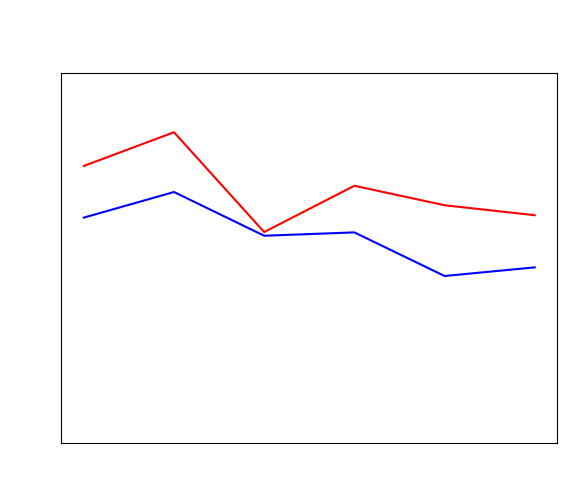

In [15]:
plt.title("Wie sehr vertrauen Sie Technik?\n\n")
plt.suptitle("Blau: autonomes Fahren, Rot: Generell\n\n")

plot_values(data, lambda x: 1 - x["data2"]["q2"], "Kein Vertrauen", "Volles Vertrauen", color="blue")
plot_sorted_by_age_range(data, lambda x: 1 - x["data2"]["q3"], "red")
plt.savefig("results/technikvertrauen.png", transparent=True, bbox_inches="tight")


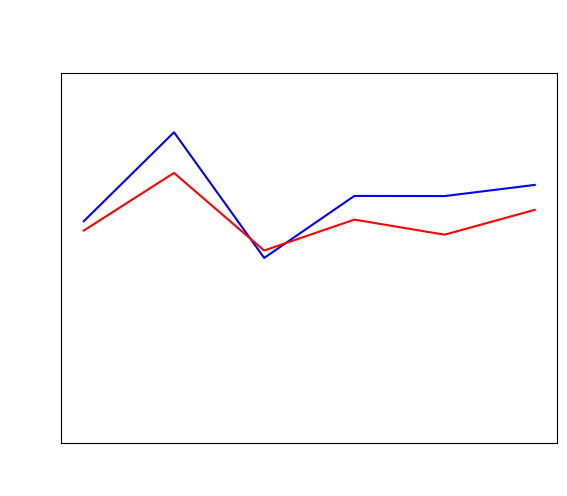

In [18]:
plt.title("Stau und Verkehrssicherheit?\n\n")
plt.suptitle("Blau: männlich, Rot: weiblich\n")

plot_values([x for x in data if x["data1"]["gender"] == "m"], lambda x: x["data3"]["q2Result"], "Gar nicht", "Absolut",
            color="blue")
plot_values([x for x in data if x["data1"]["gender"] == "f"], lambda x: x["data3"]["q2Result"], "Gar nicht", "Absolut",
            color="red")
plt.savefig("results/stau_und_sicherheit.png", transparent=True, bbox_inches="tight")


In [19]:
countries = [x["data1"]["country"] for x in data]
countries = list(set(countries))
countries.sort()

countries

['CH', 'DE', 'ES', 'FI', 'GB', 'NO']

In [20]:
print("Teilnehmer:", len(data))
print("Länder:", countries)
print("Teilnehmer pro Land:")
for country in countries:
    print(f"{country}: {len([x for x in data if x['data1']['country'] == country])}")

Teilnehmer: 116
Länder: ['CH', 'DE', 'ES', 'FI', 'GB', 'NO']
Teilnehmer pro Land:
CH: 1
DE: 111
ES: 1
FI: 1
GB: 1
NO: 1


In [23]:
print("Alle Freeform-Antworten:")
for datum in data:
    if "freeform" in datum["data4"] and datum["data4"]["freeform"] != "":
        print(datum["data4"]["freeform"], end="\n\n")

Alle Freeform-Antworten:
Autonomes Fahren ist für mich noch sehr futuristisch. Die Verkehrssicherheit wird dadurch sicherlich erhöht. Allerdings wird der Spaßfaktor des Autofahrens gesenkt. Die Individualität geht mehr und mehr verloren. Die Marke und der Motor des Autos wird immer unbedeutender. Das Autofahren wird langweiliger. 

Autos selbst sind das Problem. Autonomes fahren kann bei Behinderunen helfen, kann jedoch keine Lösung sein für das generelle Problem des Personen Verkehrs. 

In Bezug auf die Sicherheit von Autonomen fahren:
Sicherlich wird es erst dann wirklich sicher, wenn im Verkehr primär autonome Fahrzeuge verkehren.
Das würde dann nämlich dafür sorgen, dass man diese miteinander verbinden könnte und somit eine Art
Karte erstellen könnte, mithilfe dessen diese Autos wissen wo sich andere befinden. Das wäre eine Möglichkeit Unfälle massiv zu reduzieren.

Bezüglich der aktuellen Problematiken wie Staus etc.: Meines Erachtens lassen sich durch die Nutzung von Autonomen Fa

In [25]:
print("Alle Freeform-Parents-Antworten:")
for datum in data:
    if "freeformParents" in datum["data4"] and datum["data4"]["freeformParents"] != "":
        print(datum["data4"]["freeformParents"], end="\n\n")

Alle Freeform-Parents-Antworten:
Mehr Zeit für die Kinder beim Fahren.

Man kann sich voll auf die Inder konzentrieren 

Während der Fahrt könnte man sich mit den Kindern beschäftigen.

Nicht, wenn der Fahrzeugführer jrderzeit eingreifen können muss.

You have more time with your children


weniger abgelenkt

Eltern müssten die Kinder nicht mehr fahren 

Man kann sich unterhalten, Spiele spielen, die Fahrzeit sinnvoll nutzen.

Keine Ablenkung

Da man sich mit Kindern im Auto öfter abgelenkt f0hlt, würde es wohl die Fahrsicherheit erhöhen.

Der Fahrer kann von den Kindern nicht beim bzw.  vom Fahren abgelenkt werden, möglicherweise werden dadurch Unfälle vermieden.

Die Eltern können während der Fahrt sich um die Kinder kümmern, besonders wenn sie klein sind. Es wäre wie Zug fahren, nur das man nicht umsteigen muss und mehr Gepäck mitnehmen kann.

Keine geteilte Konzentration. Weniger Ablenkung vom fahren

Eltern sind nicht so abgelenkt. Gerade bei langen Fahrten können Sie besser auf d

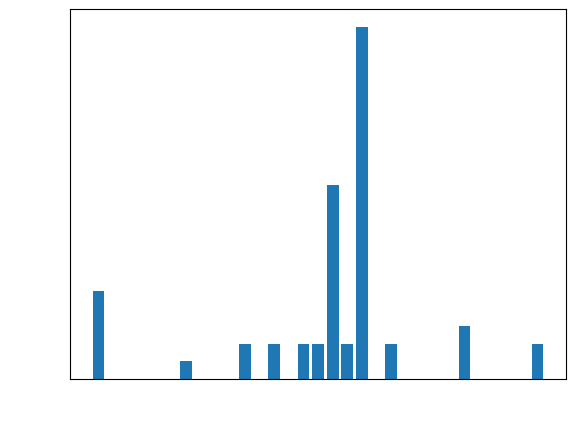

In [43]:
dataPoints = [
    {
        "situationsFamilies": x["data3"]["situations"]["fahrtenMitKindern"],
        "age": x["data2"]["q4"],
    } for x in data if x["data1"]["hasChildren"] and x["data2"]["q4"] is not None and x["data2"]["q4"] != 0.66 and x["data2"]["q4"] != 100
]

differentAges = list(set([x["age"] for x in dataPoints]))
differentAges.sort()

ageCounts = {age: len([x for x in dataPoints if x["age"] == age]) for age in differentAges}

# bar chart with counts of each age group

plt.xlabel("Minimalalter für autonomes Fahren")
plt.ylabel("Anzahl der Teilnehmer")
plt.bar(ageCounts.keys(), ageCounts.values())

plt.savefig("results/alter.png", transparent=True, bbox_inches="tight")




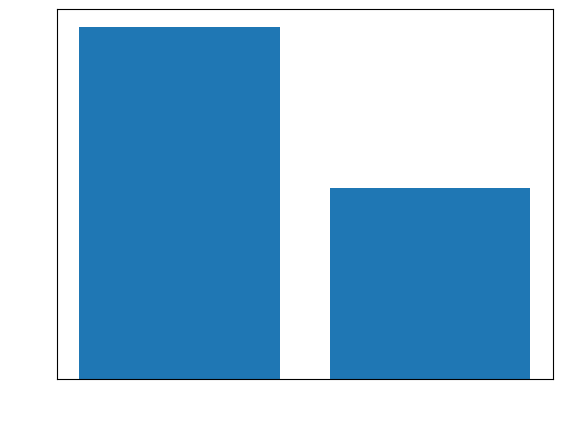

In [45]:

# bar chart yes/no situationsFamilies

sitYes = [x for x in dataPoints if x["situationsFamilies"]]
sitNo = [x for x in dataPoints if not x["situationsFamilies"]]

plt.xlabel("Ja (1) oder Nein (0) zu Situationen mit Kindern")
plt.ylabel("Anzahl der Teilnehmer")

plt.bar([0, 1], [len(sitNo), len(sitYes)])

plt.savefig("results/situationen_mit_kindern.png", transparent=True, bbox_inches="tight")

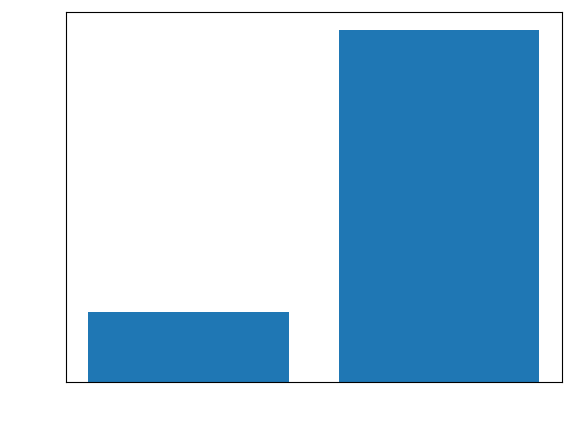

In [48]:
dataPoints = [
    x["data3"]["situations"]["altePersonen"] for x in data if "altePersonen" in x["data3"]["situations"]
]

# bar chart yes/no oldPeople

sitYes = [x for x in dataPoints if x]
sitNo = [x for x in dataPoints if not x]

plt.xlabel("Ja (1) oder Nein (0) zu Situationen mit alten Personen")
plt.ylabel("Anzahl der Teilnehmer")

plt.bar([0, 1], [len(sitNo), len(sitYes)])
plt.savefig("results/situationen_mit_alten_personen.png", transparent=True, bbox_inches="tight")